# Acerca del conjunto de datos
Los datos incluyen las últimas reseñas de programas de televisión de IMDB. Miles de reseñas se recopilan para entrenar modelos de procesamiento del lenguaje natural (PLN), análisis de texto y análisis de sentimientos.

* Review ID- El ID único asignado a cada reseña

* Show ID- Identificación para un programa de televisión

* Rating (out of 10)- Es la calificación que otorga el usuario en una escala del 1 al 10

* Review- El comentario detallado proporcionado por el usuario sobre el espectáculo.

**Importaciones**

In [18]:
# 📦 Librerías estándar
import os

# 📊 Visualización
import matplotlib.pyplot as plt
import seaborn as sns


# 🧪 Scikit-learn
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score,
    auc,
    classification_report,
    ConfusionMatrixDisplay,
    confusion_matrix,
    f1_score,
    mean_squared_error,
    precision_score,
    recall_score,
    roc_curve,
    RocCurveDisplay,
    r2_score,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# 💾 Guardado de modelos
import joblib



# 📐 Numpy y Pandas
import numpy as np
import pandas as pd

**EDA**

In [19]:
path = 'C:\\Users\\gvald\\Desktop\\Proyecto2\\datasets\\dataset2.csv'
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8319 entries, 0 to 8318
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          8319 non-null   int64 
 1   Rating (out of 10)  8319 non-null   int64 
 2   Review              8319 non-null   object
 3   Show ID             8319 non-null   object
 4   Review ID           8319 non-null   object
dtypes: int64(2), object(3)
memory usage: 325.1+ KB


In [20]:
df = df.drop(columns=['Unnamed: 0'])
# Limpieza de espacios
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [21]:
df.head()

,rating_(out_of_10),review,show_id,review_id
0,9,Andor was every bit as good as I was hoping fo...,tt9253284,rw10514299
1,10,Wow. I just finished episode 12 of the first s...,tt9253284,rw8690571
2,10,Andor Season 2 is the best Star Wars Show ever...,tt9253284,rw10514285
3,9,There were a few episodes I didn't like in bot...,tt9253284,rw10514788
4,9,Didnt like the new movies and even Mandalorian...,tt9253284,rw8665236


In [22]:
df.describe()

,rating_(out_of_10)
count,8319.000000
mean,8.063349
std,2.441713
min,1.000000
25%,7.000000
50%,9.000000
75%,10.000000
max,10.000000


In [23]:
df.isna().sum() 

rating_(out_of_10)    0
review                0
show_id               0
review_id             0
dtype: int64

In [24]:
(df == '?').sum()

rating_(out_of_10)    0
review                0
show_id               0
review_id             0
dtype: int64

In [44]:
df.duplicated().sum()

np.int64(0)

In [28]:
df["rating_(out_of_10)"].value_counts()

rating_(out_of_10)
10    3362
9     1480
8      998
6      700
7      697
1      315
3      213
5      212
4      189
2      153
Name: count, dtype: int64

**Graficos de relacion**

In [47]:
# Solo tiene una columna numérica real
corr = df[['rating_(out_of_10)','review','show_id','review_id']].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('🔍 Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()


ValueError: could not convert string to float: "Andor was every bit as good as I was hoping for. It might be the best Star Wars series to date, I used to think it was The Mandalorian but these two seasons of Andor have been flawless. Of all the Star Wars series so far this one is probably the least known character but that doesn't mean it's any less interesting. Andor is a character from one of the best Star Wars movies, Rogue One. All the reviews have been great for Andor so that got my expectations even higher and so far they've all been met. It has a real gritty feel to it compared to the other Star Wars series and the visuals are great. It's also more adult oriented compared to the other shows so far. But the cast, led by Diego Luna, is the best thing about this show. Well that and the writing. These two seasons of Andor have been nothing short of incredible and easily the best thing Star Wars has done since the original trilogy."

C:\Users\gvald\AppData\Local\Temp\ipykernel_74852\3210539073.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating_(out_of_10)', palette='viridis')


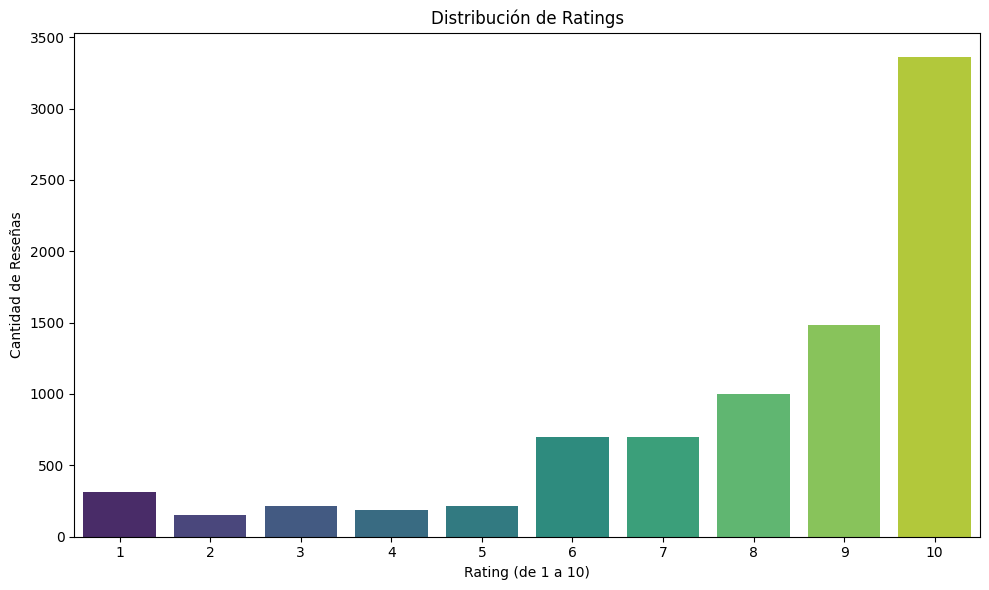

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating_(out_of_10)', palette='viridis')
plt.title('Distribución de Ratings')
plt.xlabel('Rating (de 1 a 10)')
plt.ylabel('Cantidad de Reseñas')
plt.tight_layout()
plt.show()

C:\Users\gvald\AppData\Local\Temp\ipykernel_74852\2212641250.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_shows.index, y=top_shows.values, palette='magma')


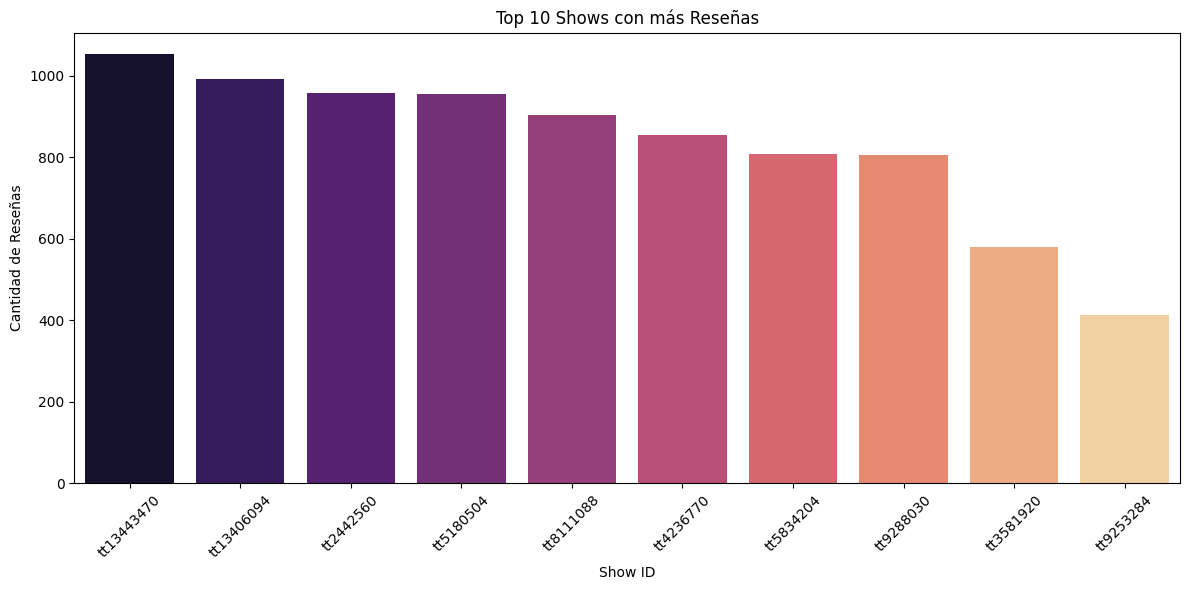

In [43]:
top_shows = df['show_id'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_shows.index, y=top_shows.values, palette='magma')
plt.title('Top 10 Shows con más Reseñas')
plt.xlabel('Show ID')
plt.ylabel('Cantidad de Reseñas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()